In [11]:
!pip3 install Cython

In [12]:
!pip install torch
!pip install torchvision

In [13]:
import torch
from torchvision import datasets
from torchvision import transforms
import torch.utils.data as data_utils
import matplotlib.pyplot as plt

In [14]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

# Download the MNIST Dataset
dataset = datasets.MNIST(root = "./data",
						train = True,
						download = True,
						transform = tensor_transform)

indices = torch.arange(30000)
subset = data_utils.Subset(dataset, indices)

# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = subset,
									batch_size = 256,
									shuffle = True)


8
torch.Size([28, 28, 1])


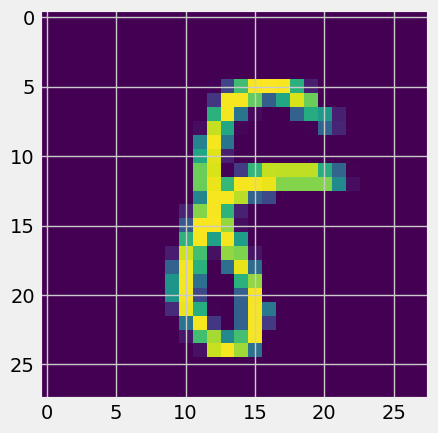

In [15]:
image, label = dataset.__getitem__(456)
print (label)
image = torch.transpose(torch.swapaxes(image, 0, 2), 0, 1)
print (image.shape)
plt.figure()
plt.imshow(image)
plt.show()

In [16]:
from torch.nn import Sigmoid
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
	def __init__(self):
		super().__init__()

		# Building an linear encoder with Linear
		# layer followed by Relu activation function
		# 784 ==> 9
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(28 * 28, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 2)
		)

		# Building an linear decoder with Linear
		# layer followed by Relu activation function
		# The Sigmoid activation function
		# outputs the value between 0 and 1
		# 9 ==> 784
		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(2, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 28 * 28),
      torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded


In [17]:
# Model Initialization
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.001
optimizer = torch.optim.Adam(model.parameters(),
							lr = 1e-3)


In [ ]:
epochs = 5
outputs = []
losses = []
for epoch in range(epochs):
  print (epoch)
  i = 0
  for (image, _label) in loader:
    if i % 100 == 0: print('.',end="")
    i = i + 1
    # Reshaping the image to (-1, 784)
    image = image.reshape(-1, 28*28)

    # Output of Autoencoder
    reconstructed = model(image)

    # Calculating the loss function
    loss = torch.mean(torch.square(reconstructed - image))
    #loss = loss_function(reconstructed, image)

    # The gradients are set to zero,
    # the gradient is computed and stored.
    # .step() performs parameter update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #print (loss.values)
    # Storing the losses in a list for plotting
    losses.append(loss.detach().cpu())
  #outputs.append((epoch, image, reconstructed))

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses)


0
..1
..2
..3
..4
.

In [ ]:
image, label = dataset.__getitem__(12)


reconstruction = model(image.reshape(1,1,28*28)).detach().cpu().reshape(28,28)
coordinate =  model.encoder(image.reshape(1,1,28*28)).detach().cpu().reshape(2)
print (label, image.shape, coordinate)
image = torch.transpose(torch.swapaxes(image, 0, 2), 0, 1)
plt.figure()
plt.imshow(image)

plt.figure()
plt.imshow(reconstruction)


plt.show()



In [ ]:
plt.figure()
for x in range(-5,6):
  for y in range(-5,6):
    coordinate = torch.tensor((1.0*x,1.0*y))
    image = model.decoder(coordinate).detach().cpu().reshape(28,28)
    ax = plt.subplot2grid((11,11),(x+5,y+5))
    plt.imshow(image)
    ax.axis('off')